In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


In [2]:
file = ("dataset.csv")
df = pd.read_csv(file, encoding="ISO-8859-1")
df.head(1)

,Unnamed: 0,Company Name,Primary Industry Code,Primary Industry Sector,Primary Industry Group,Verticals,Total Raised,Year Founded,HQ Location,HQ Country,...,Last Financing Deal Class,Growth Rate,Growth Rate Percentile,Web Growth Rate,Web Growth Rate Percentile,Social Growth Rate,Social Growth Rate Percentile,Twitter Growth Rate,Twitter Growth Rate Percentile,Twitter Followers
0,2,Zylo,Media and Information Services (B2B),Business Products and Services (B2B),Commercial Services,"SaaS, TMT",12.6,2016.0,"Indianapolis, IN",United States,...,Venture Capital,2.23,99.0,3.8,100.0,0.66,96.0,0.66,96.0,1451.0


In [3]:
df.rename(columns = {'HQ Location': 'location'}, inplace=True)
df.count()

Unnamed: 0                        741
Company Name                      741
Primary Industry Code             741
Primary Industry Sector           741
Primary Industry Group            741
Verticals                         741
Total Raised                      741
Year Founded                      741
location                          741
HQ Country                        741
HQ Global Region                  741
Active Investors                  741
# Active Investors                741
First Financing Date              741
First Financing Size              741
First Financing Deal Type         741
First Financing Deal Class        741
Last Financing Date               741
Last Financing Size               741
Last Financing Deal Type          741
Last Financing Deal Class         741
Growth Rate                       741
Growth Rate Percentile            741
Web Growth Rate                   741
Web Growth Rate Percentile        741
Social Growth Rate                741
Social Growt

In [4]:
#Separate the locations into City and States
df2 = df.copy()
col = ["location"]
df_data = df2[col]
df_data[['City','State']] = df_data.location.str.split(",",expand=True,)
df_data

C:\Users\subil\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,location,City,State
0,"Indianapolis, IN",Indianapolis,IN
1,"Calabasas, CA",Calabasas,CA
2,"New York, NY",New York,NY
3,"Dallas, TX",Dallas,TX
4,"New York, NY",New York,NY
...,...,...,...
736,"New York, NY",New York,NY
737,"San Mateo, CA",San Mateo,CA
738,"Berkeley, CA",Berkeley,CA
739,"Amsterdam, Netherlands",Amsterdam,Netherlands


In [5]:
#Look if there's any columns from 'State' empty
df_data.loc[ df_data.isnull().any(axis=1)]

,location,City,State
397,CA,CA,None


In [6]:
#Fill the empty cell
df_data['State'].fillna('CA', inplace=True)

C:\Users\subil\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [7]:
#Count how many startups each State has
results = Counter(" ".join(df_data['State'].values.tolist()).split(" ")).items()
results

dict_items([('', 740), ('IN', 3), ('CA', 318), ('NY', 85), ('TX', 24), ('Israel', 23), ('MD', 4), ('MA', 59), ('China', 3), ('MI', 5), ('WA', 15), ('United', 19), ('Kingdom', 19), ('OR', 6), ('CO', 12), ('DC', 8), ('GA', 8), ('VA', 10), ('Switzerland', 5), ('CT', 3), ('UT', 6), ('Sweden', 1), ('Portugal', 1), ('Taiwan', 1), ('Germany', 12), ('IL', 12), ('Japan', 11), ('Canada', 18), ('Singapore', 2), ('KS', 1), ('Uganda', 1), ('NJ', 3), ('Belgium', 1), ('NC', 6), ('AZ', 3), ('NV', 2), ('PA', 9), ('Colombia', 1), ('India', 8), ('Ireland', 1), ('Australia', 1), ('LA', 1), ('Nigeria', 1), ('Netherlands', 2), ('Russia', 1), ('France', 7), ('Spain', 3), ('RI', 1), ('Brazil', 1), ('OH', 4), ('MT', 1), ('Finland', 1), ('TN', 1), ('MN', 1), ('MO', 2), ('FL', 1), ('South', 1), ('Africa', 1), ('Thailand', 1)])

In [8]:
#Get the 4 biggest States with Startup
map_df = pd.DataFrame(results, columns=['State','amount'])
map_data = map_df.nlargest(5,['amount'])
map_data

,State,amount
0,,740
2,CA,318
3,NY,85
7,MA,59
4,TX,24


In [9]:
#Drop the first line, it's the total and I don't need it
map_data.drop([0], inplace=True)
map_data

,State,amount
2,CA,318
3,NY,85
7,MA,59
4,TX,24


In [10]:
#Create a csv file with the 4 biggest States
map_data.to_csv('state.csv', index=False)

In [11]:
#Checking how many startups in each country this data 
df['HQ Country'] = df["HQ Country"].str.replace(" ","")
result = Counter(" ".join(df['HQ Country'].values.tolist()).split(" ")).items()
result

dict_items([('UnitedStates', 614), ('Israel', 23), ('China', 3), ('UnitedKingdom', 19), ('Switzerland', 5), ('Sweden', 1), ('Portugal', 1), ('Taiwan', 1), ('Germany', 12), ('Japan', 11), ('Canada', 18), ('Singapore', 2), ('Uganda', 1), ('Belgium', 1), ('Colombia', 1), ('India', 8), ('Ireland', 1), ('Australia', 1), ('Nigeria', 1), ('Netherlands', 2), ('Russia', 1), ('France', 7), ('Spain', 3), ('Brazil', 1), ('Finland', 1), ('SouthAfrica', 1), ('Thailand', 1)])

In [12]:
#Couting the sectors of the startups 
df['Primary Industry Sector'] = df["Primary Industry Sector"].str.replace(" ","")
result = Counter(" ".join(df['Primary Industry Sector'].values.tolist()).split(" ")).items()
result

dict_items([('BusinessProductsandServices(B2B)', 99), ('ConsumerProductsandServices(B2C)', 129), ('InformationTechnology', 435), ('Healthcare', 27), ('Energy', 36), ('FinancialServices', 11), ('MaterialsandResources', 4)])

In [13]:
#Create a df for the sectors
sector_df = pd.DataFrame(result, columns=['sector', 'number'])
sector_df

,sector,number
0,BusinessProductsandServices(B2B),99
1,ConsumerProductsandServices(B2C),129
2,InformationTechnology,435
3,Healthcare,27
4,Energy,36
5,FinancialServices,11
6,MaterialsandResources,4


In [14]:
#Put the df in order
sector_df = sector_df.sort_values('number')

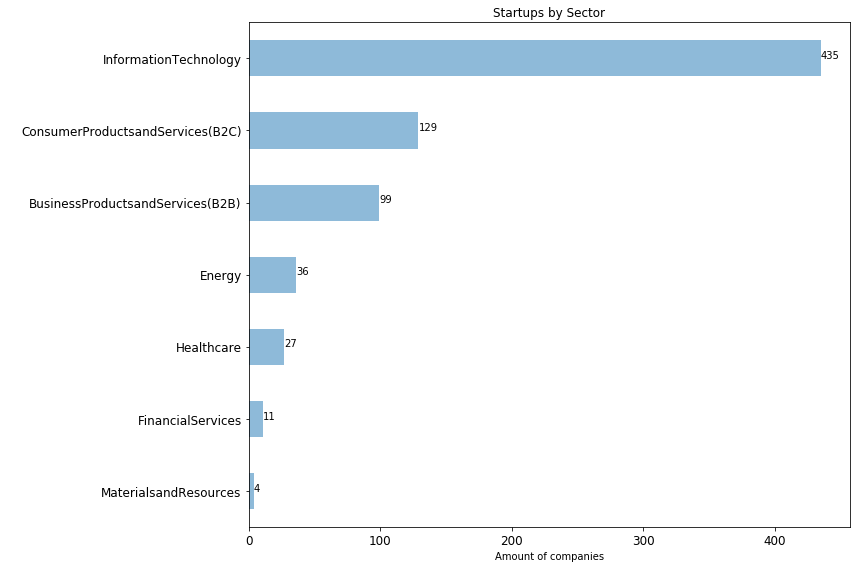

In [15]:
# Create the chart
y = sector_df['number']
sector_df.plot(kind='barh',  x='sector', y='number', title ="Startups by Sector",figsize=(12, 8), legend=None, fontsize=12, alpha = 0.5)
plt.xlabel('Amount of companies')
plt.ylabel(' ')
plt.tight_layout()

for index, value in enumerate(y):
    plt.text(value, index, str(value))

plt.savefig('sectors.png')

In [16]:
#Separate the locations into City and States
df3 = df.copy()
col=["Company Name","Year Founded"]
year = df3[col]
year.head()

,Company Name,Year Founded
0,Zylo,2016.0
1,Zya,2008.0
2,Zola,2013.0
3,Zimperium,2010.0
4,ZergNet,2012.0


In [17]:
#Get how many years these companies are open
y = 2019
year_df = pd.DataFrame(year)
final = year_df.assign(old=y - year_df['Year Founded'])
final

,Company Name,Year Founded,old
0,Zylo,2016.0,3.0
1,Zya,2008.0,11.0
2,Zola,2013.0,6.0
3,Zimperium,2010.0,9.0
4,ZergNet,2012.0,7.0
...,...,...,...
736,88Rising,2015.0,4.0
737,4INFO,2004.0,15.0
738,3DR,2012.0,7.0
739,3D Hubs,2013.0,6.0


In [18]:
#Put the oldest companies on the top of the df
final.nlargest(300,['old'])

,Company Name,Year Founded,old
419,Ionic Materials,1986.0,33.0
197,Savi Technology,1989.0,30.0
230,Reaction Engines,1989.0,30.0
314,NSS Labs,1991.0,28.0
602,Cortera,1993.0,26.0
...,...,...,...
203,ROMO Wind,2011.0,8.0
229,Realm,2011.0,8.0
231,Rayvio,2011.0,8.0
232,Raptor Oil,2011.0,8.0
